In [1]:
%matplotlib notebook

import numpy as np
import h5py
import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend('ipyvtklink')

In [2]:
def decorate_tri_faces(faces):
    return np.hstack([np.expand_dims(np.full([faces.shape[0]], 3), 1), faces])



In [421]:
temp = 0.00001
jacobian = True
experiment_name = 'direct'
mcmc_type = 'nuts'
bounded = False

jacobian_str = '_jacobian' if jacobian else ''
bounded_str = '_bounded' if bounded else ''
data = h5py.File('uniformity/' + experiment_name + '/temp_' + str(temp) + jacobian_str + bounded_str + '_' + mcmc_type + '_result.hdf5', 'r')
v, f, sample_density, triangle_areas = data['v'], data['f'], data['sample_density'], data['triangle_area']
v, f, sample_density, triangle_areas = np.array(v), np.array(f), np.array(sample_density), np.array(triangle_areas)
density_ratio = np.array(data['density_ratio'])
points = np.array(data['samples'])
neighborhood_density = np.array(data['neighborhood_density'])
neighborhood_area = np.array(data['neighborhood_area'])
print(np.array(data['density_diff']))

0.36279212491323065


In [422]:
a = np.argmax(density_ratio)
print(sample_density[a], density_ratio[a], triangle_areas[a])
print(np.mean(sample_density), np.mean(density_ratio), np.mean(triangle_areas))

0.0004 7.645582457879334 5.231779294823649e-05
0.0006157635467980296 1.01559293889461 0.0006157635467980296


In [423]:
plotter = pv.Plotter()
mesh_pd = pv.PolyData(v, decorate_tri_faces(f))
mesh_pd.cell_data['weights'] = density_ratio
plotter.add_mesh(mesh_pd, clim=[0, 5],
           below_color='purple', above_color='yellow')
plotter.show(jupyter_backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(color='#fefefe', inten…

/Users/ericachiu/miniconda3/envs/Meng/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

dlopen(/Users/ericachiu/miniconda3/envs/Meng/lib/python3.9/site-packages/vtkmodules/vtkIONetCDF.cpython-39-darwin.so, 2): Symbol not found: _H5Pset_fapl_ros3
  Referenced from: /Users/ericachiu/miniconda3/envs/MENG/lib/libnetcdf.19.dylib
  Expected in: /Users/ericachiu/miniconda3/envs/MENG/lib/libhdf5.103.dylib
 in /Users/ericachiu/miniconda3/envs/MENG/lib/libnetcdf.19.dylib

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


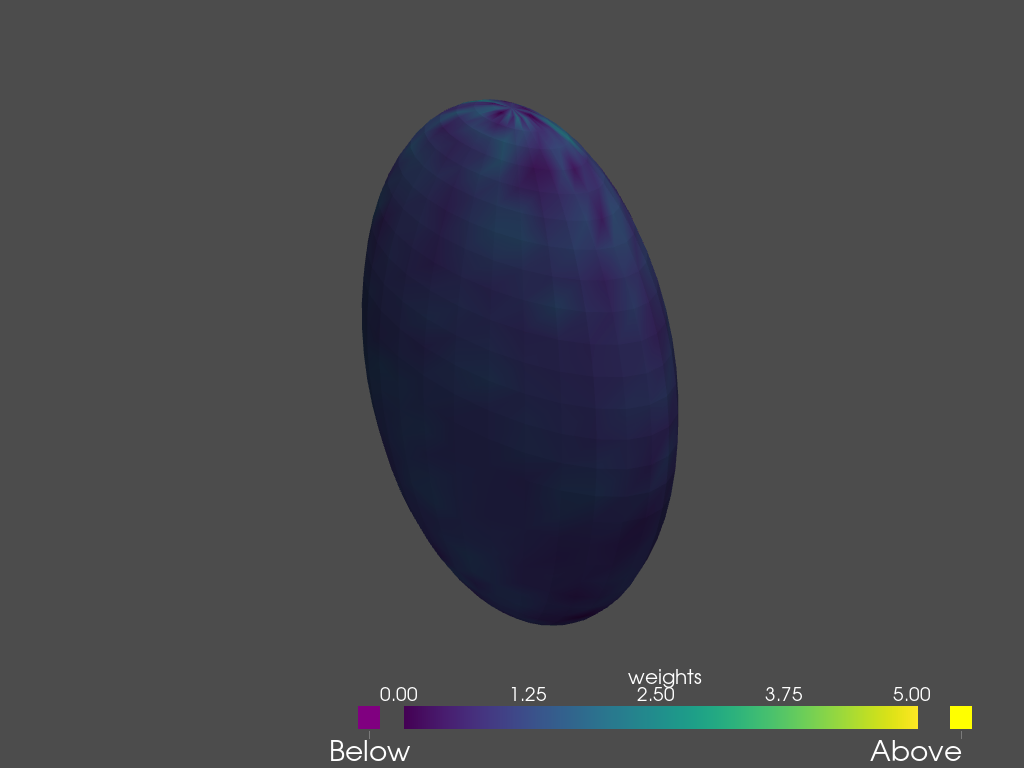

In [424]:
plotter = pv.Plotter()
mesh_pd = pv.PolyData(v, decorate_tri_faces(f))
mesh_pd.point_data['weights'] = neighborhood_density / neighborhood_area
plotter.add_mesh(mesh_pd, clim=[0, 5],
           below_color='purple', above_color='yellow')
plotter.show(jupyter_backend='ipyvtklink')

<IPython.core.display.Javascript object>


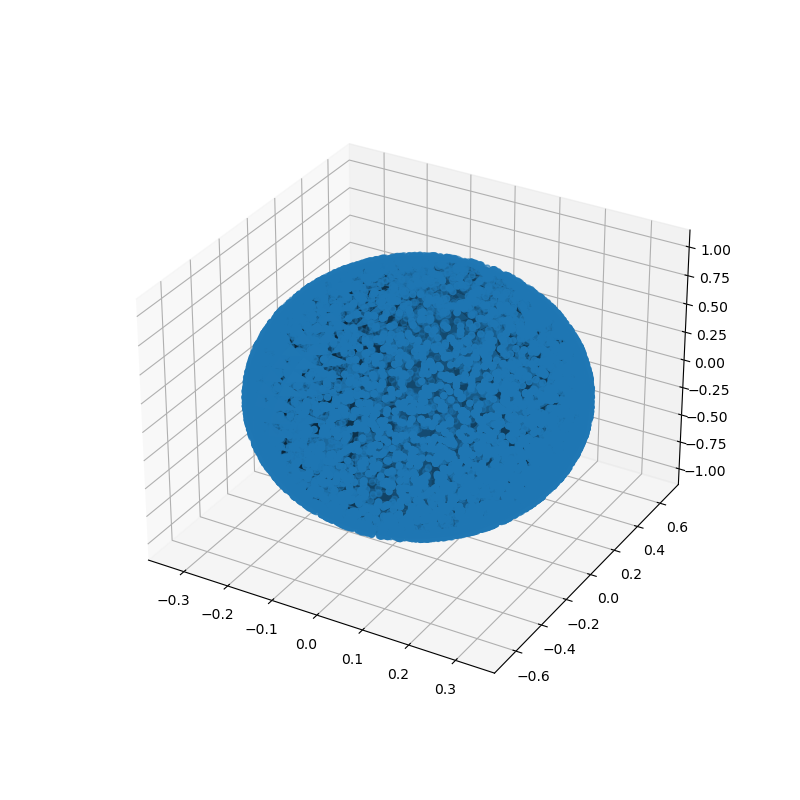

In [425]:
starting_cutoff = 0
x = points[starting_cutoff:,0]
y = points[starting_cutoff:,1]
z = points[starting_cutoff:, 2]

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
vert_x, vert_y, vert_z = v.T
result = ax.plot_trisurf(vert_x,vert_y,vert_z, triangles=f)

ax.scatter(x,y,z)
plt.show()

In [34]:
data.keys()

<KeysViewHDF5 ['f', 'sample_density', 'samples', 'triangle_area', 'v']>